# 서울시 유동 인구

선 그래프, 지도 그래프로 시각화

2. 5월부터 7월 까지의 유동량을 분석

    - 요일별 / 시간별 로 나눠서 시각화

In [213]:
import pandas as pd
import numpy as np 
import datetime
import matplotlib.pyplot as plt 

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [214]:
df5 = pd.read_csv('../input/Floating_Population_2005.csv')
df6 = pd.read_csv('../input/Floating_Population_2006.csv')
df7 = pd.read_csv('../input/Floating_Population_2007.csv')

df_all = pd.concat([df5, df6, df7])
# df_all = pd.concat([df7])
df_all.head()

,일자,시간(1시간단위),연령대(10세단위),성별,시,군구,유동인구수
0,20200501,1,20,남성,서울,중구,12000
1,20200501,1,20,여성,서울,은평구,28680
2,20200501,1,50,남성,서울,관악구,34470
3,20200501,1,50,여성,서울,강북구,26500
4,20200501,1,70,여성,서울,은평구,24120


In [215]:
df = df_all[['일자', '군구', '유동인구수']]

df['날짜'] = df['일자'].apply(lambda x : str(x)[:4] + "-" + str(x)[4:6] + "-" + str(x)[6:8])
df['월'] = df['일자'].apply(lambda x : str(x)[5])
df.drop(['일자'], axis=1, inplace=True)

df['날짜'] = pd.to_datetime(df['날짜'])

df.head()

,군구,유동인구수,날짜,월
0,중구,12000,2020-05-01,5
1,은평구,28680,2020-05-01,5
2,관악구,34470,2020-05-01,5
3,강북구,26500,2020-05-01,5
4,은평구,24120,2020-05-01,5


In [216]:
df = df[['날짜', '유동인구수']]
df['요일'] = df['날짜'].dt.day_name()
df['week'] = df['날짜'].dt.dayofweek
df

,날짜,유동인구수,요일,week
0,2020-05-01,12000,Friday,4
1,2020-05-01,28680,Friday,4
2,2020-05-01,34470,Friday,4
3,2020-05-01,26500,Friday,4
4,2020-05-01,24120,Friday,4
...,...,...,...,...
223195,2020-07-31,29360,Friday,4
223196,2020-07-31,32900,Friday,4
223197,2020-07-31,34010,Friday,4
223198,2020-07-31,21960,Friday,4


In [217]:
df = df.sort_values(by=['week'])
df

,날짜,유동인구수,요일,week
109724,2020-06-08,19390,Monday,0
85364,2020-05-18,29960,Monday,0
85363,2020-05-18,31760,Monday,0
85362,2020-05-18,25010,Monday,0
85361,2020-05-18,29700,Monday,0
...,...,...,...,...
196884,2020-05-03,42910,Sunday,6
196885,2020-05-03,38720,Sunday,6
196886,2020-05-03,39890,Sunday,6
196872,2020-05-03,22010,Sunday,6


In [218]:
pd.pivot_table(df, index=['week'], values=['유동인구수'], aggfunc=np.sum)

,유동인구수
week,
0,2588085550
1,2587904300
2,2596443390
3,2584202990
4,2710005690
5,2463230650
6,2447819540


In [219]:
week = df.groupby(['week'])['유동인구수'].sum()
week = week // 1000000
week

week
0    2588
1    2587
2    2596
3    2584
4    2710
5    2463
6    2447
Name: 유동인구수, dtype: int64

In [220]:
week_lst = df['요일'].unique().tolist()
# week_lst
week.index = week_lst

<BarContainer object of 7 artists>

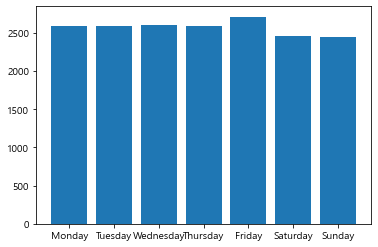

In [221]:
# plt.bar(['Sunday', 'Monday', 'Tuesday'], week)
# week.index = []
plt.bar(week.index, week)

In [222]:
w = week.reset_index()
w

,index,유동인구수
0,Monday,2588
1,Tuesday,2587
2,Wednesday,2596
3,Thursday,2584
4,Friday,2710
5,Saturday,2463
6,Sunday,2447
